# Exploratory Analysis of Crime Patterns in the USA (June 2015 - September 2018)

Crime analysis plays a crucial role in understanding patterns, trends, and factors influencing criminal activities within a specific region and timeframe. In this project, we delve into a dataset containing crime incidents in the USA from June 2015 to September 2018. By utilizing Python, pandas, matplotlib, and seaborn, we aim to uncover insightful information about the nature of these crimes, their distribution across various parameters, and trends that could aid law enforcement agencies and policymakers in crime prevention strategies.

## Introduction
Crime is a complex and multifaceted social phenomenon that requires a comprehensive approach for effective analysis. This project focuses on analyzing a dataset encompassing crime incidents spanning three years in the USA. The dataset contains information such as offense type, location, date, and other relevant attributes. By applying data analysis techniques, we aim to shed light on various aspects of these crimes, helping us understand patterns and trends that may inform crime mitigation strategies.

### Methods

    Data Preprocessing: Load the dataset using pandas, clean and format data, handle missing values, and ensure consistency.

    Exploratory Data Analysis (EDA):
        Most Common Offense Group: Identify the most frequent crime types by grouping offenses.
        Top Ten Crimes in Offense Group: Visualize the top ten specific crimes within the most common offense group.
        Least Common Offense Group: Identify and explore the least common offense group.
        Year-wise Crime Distribution: Analyze crime distribution across years to identify trends.
        Day-wise Crime Distribution: Examine crime occurrence patterns across days of the week.
        Hour-wise Crime Distribution: Explore patterns of crime occurrence throughout the day.
        Day and Hour-wise Heatmap: Create a heatmap of crimes based on days and hours.

**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from encodings.aliases import aliases

## Read CSV file and Cleaning the data


**Set up correct encoding for the dataset**

In [2]:

alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df = pd.read_csv('crime.csv', nrows= 10, encoding= encoding)
        print('sucessful', encoding)
    except:
        pass

sucessful iso8859_8
sucessful cp775
sucessful cp1257
sucessful gbk
sucessful cp860
sucessful cp1251
sucessful iso8859_14
sucessful cp1258
sucessful cp857
sucessful cp437
sucessful cp932
sucessful iso8859_13
sucessful kz1048
sucessful mac_latin2
sucessful cp1253
sucessful iso8859_15
sucessful cp1140
sucessful cp037
sucessful iso8859_5
sucessful cp949
sucessful utf_16_be
sucessful cp500
sucessful cp858
sucessful cp864
sucessful iso8859_10
sucessful mac_turkish
sucessful iso8859_2
sucessful iso8859_11
sucessful cp869
sucessful koi8_r
sucessful iso8859_7
sucessful ptcp154
sucessful cp1256
sucessful cp273
sucessful utf_16_le
sucessful cp866
sucessful iso8859_3
sucessful iso8859_4
sucessful mac_cyrillic
sucessful iso8859_6
sucessful iso8859_16
sucessful cp1254
sucessful cp863
sucessful mac_greek
sucessful cp850
sucessful cp1252
sucessful cp1255
sucessful big5hkscs
sucessful cp1250
sucessful hp_roman8
sucessful cp1026
sucessful iso8859_9
sucessful gb18030
sucessful cp855
sucessful cp1125
suce

**Read the dataset**

In [3]:
crime = pd.read_csv('crime.csv', encoding='ISO-8859-11').squeeze()
crime.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [4]:
crime.shape

(319073, 17)

In [5]:
crime.duplicated().sum()

23

In [6]:
crime.drop_duplicates(inplace= True)

In [7]:
crime.shape

(319050, 17)

## Exploring the dataset

In [8]:
crime.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [9]:
crime.tail(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319063,I080542626-00,3125,Warrant Arrests,WARRANT ARREST,A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Three,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
319064,I080542626-00,1848,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
319065,I080542626-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
319066,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
319067,I060168073-00,3125,Warrant Arrests,WARRANT ARREST,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Three,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [11]:
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [12]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [13]:
crime.describe(include = object)

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


**Checking the columns**

In [14]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [15]:
crime.isnull()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319069,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319070,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319071,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


**Checking columns with missing values**

In [16]:
crime.columns[np.sum(crime.isnull()) != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

**Checking columns with no missing valuse**

In [17]:
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

**Checking number of unique values in each columns**

In [18]:
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + ' has ' + str(unique_count)+ " unique values ")

INCIDENT_NUMBER has 282517 unique values 
OFFENSE_CODE has 222 unique values 
OFFENSE_CODE_GROUP has 67 unique values 
OFFENSE_DESCRIPTION has 244 unique values 
DISTRICT has 12 unique values 
REPORTING_AREA has 879 unique values 
SHOOTING has 1 unique values 
OCCURRED_ON_DATE has 233229 unique values 
YEAR has 4 unique values 
MONTH has 12 unique values 
DAY_OF_WEEK has 7 unique values 
HOUR has 24 unique values 
UCR_PART has 4 unique values 
STREET has 4657 unique values 
Lat has 18178 unique values 
Long has 18178 unique values 
Location has 18194 unique values 


**1. What are the most common crime in terms of offense group?**

In [19]:
crime.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

**2. Top ten crimes in offense group**

In [20]:
offense_group_values = crime.OFFENSE_CODE_GROUP.value_counts().head(10)

display(offense_group_values / crime.shape[0])

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

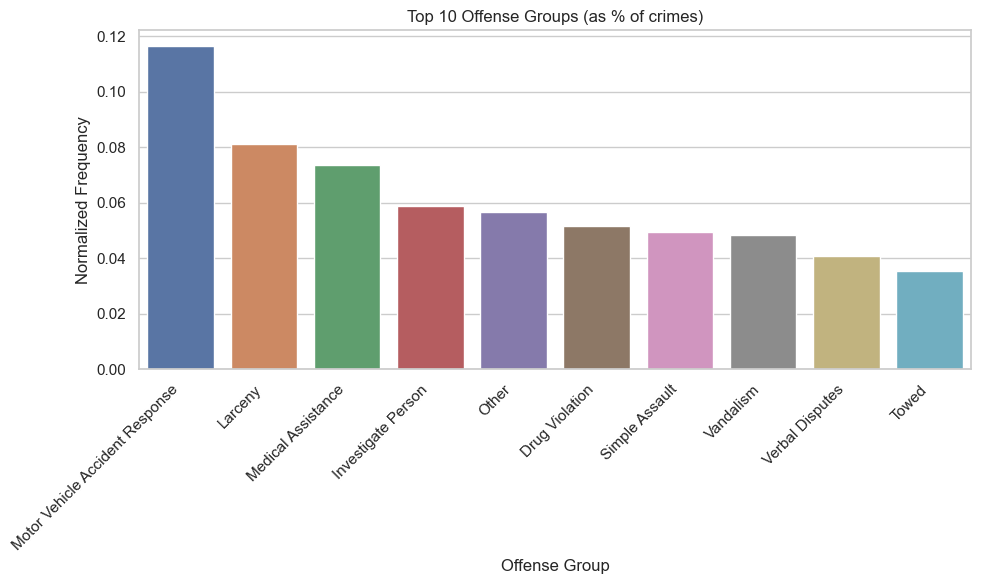

In [21]:

normalized_values = offense_group_values / crime.shape[0]

plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style using seaborn

sns.barplot(x=normalized_values.index, y=normalized_values.values)

plt.title('Top 10 Offense Groups (as % of crimes)')
plt.xlabel('Offense Group')
plt.ylabel('Normalized Frequency')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**3. Least common offense group**

In [22]:
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending = True).head(10)

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

**4.What are the most common offense descriptions?**

In [23]:
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending = False).head(10)

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64

**4. Which year most crimes are committed?**

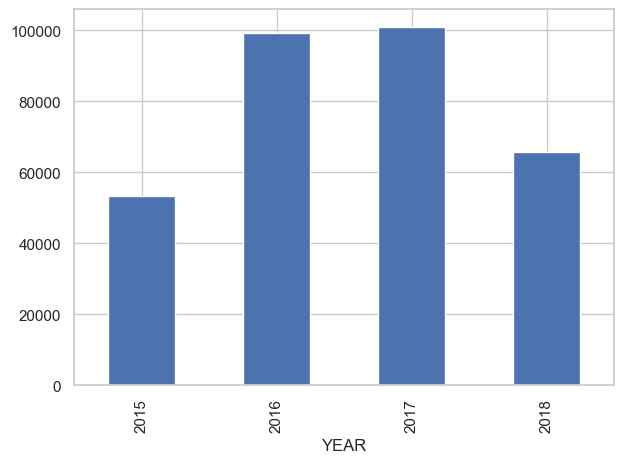

In [24]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind = 'bar')

# Beautify the plot
plt.tight_layout()


**5. Are there more crime comminted on specific days?**

<Axes: xlabel='DAY_OF_WEEK'>

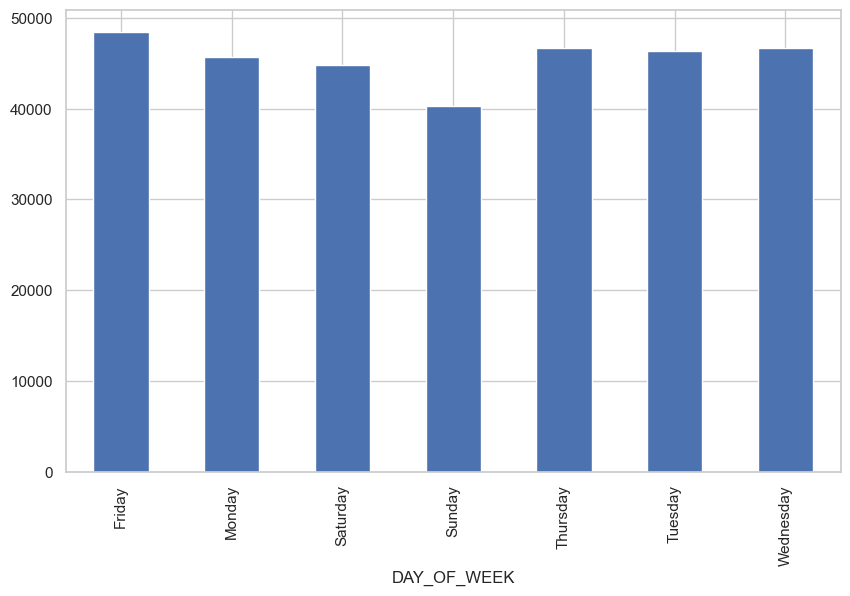

In [25]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style using seaborn

crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].plot(kind = 'bar')



**6. Crimes occured during specific hours**


<Axes: xlabel='HOUR'>

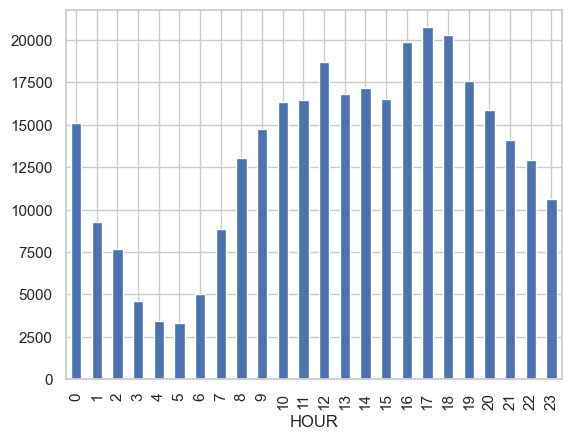

In [26]:
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind = 'bar')

**7. On which hour of the day most crimes are committed?**

In [27]:
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


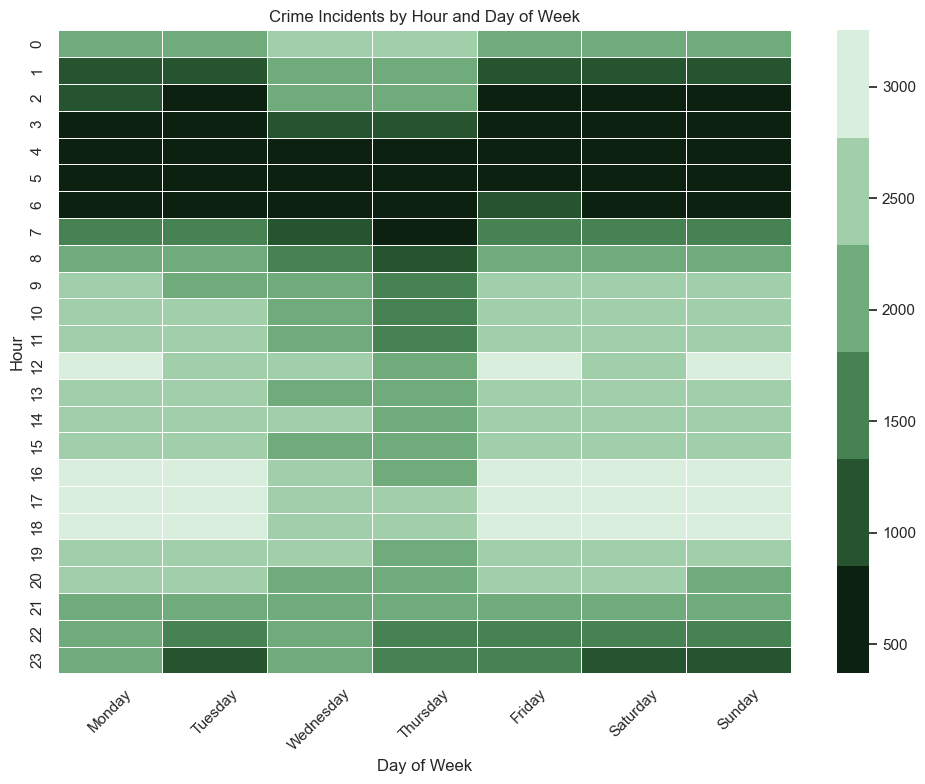

In [28]:
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_and_hour.columns = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
#sns.heatmap(week_and_hour, cmap = sns.cubehelix_palette(as_cmap= True))


custom_palette = sns.cubehelix_palette(start=2, rot=0, dark=0.1, light=0.9, reverse=True)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(week_and_hour, cmap=custom_palette, linewidths=0.5)

heatmap.set_title('Crime Incidents by Hour and Day of Week')
heatmap.set_xlabel('Day of Week')
heatmap.set_ylabel('Hour')

plt.xticks(rotation=45)

plt.tight_layout()

## Conclusion

This project's analysis enhances our understanding of crime incidents in the USA from 2015 to 2018. By employing data analysis techniques, we uncover valuable insights into crime patterns, distribution, and temporal trends. Law enforcement, policymakers, and researchers can utilize these findings to formulate effective strategies for crime prevention and resource allocation, contributing to safer communities and informed decision-making.